In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from nnpde2diff1d import NNPDE2DIFF1D
from pde2diff1d import PDE2DIFF1D

In [2]:
%%javascript
MathJax.Hub.Config({
      TeX: { equationNumbers: { autoNumber: "AMS" } }
    });MathJax.Hub.Queue(
  ["resetEquationNumbers", MathJax.InputJax.TeX],
  ["PreProcess", MathJax.Hub],
  ["Reprocess", MathJax.Hub]
);
MathJax.Hub.Queue(
  ["resetEquationNumbers", MathJax.InputJax.TeX],
  ["PreProcess", MathJax.Hub],
  ["Reprocess", MathJax.Hub]
);

<IPython.core.display.Javascript object>

## Description

This 1-D diffusion problem starts with a linear profile in x of slope -1.

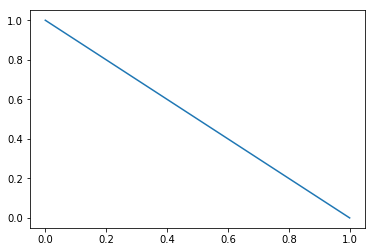

In [3]:
g0f = lambda x: 1 - x
x = np.linspace(0, 1, 101)
plt.plot(x, g0f(x));

With this starting profile, the value at the $x=0$ boundary is then linearly decreased from $1$ to $0$ in unit time.

## Create the training data.

In [4]:
nx = 21
nt = 21
xt = np.linspace(0, 1, nx)
tt = np.linspace(0, 1, nt)
x_train = np.array(list(zip(np.tile(xt, nt),np.repeat(tt, nx))))

## Read the differential equation and create the neural net.

In [5]:
deq = PDE2DIFF1D('diff1d_decrease')

In [6]:
net = NNPDE2DIFF1D(deq)

## Train the neural net.

In [7]:
np.random.seed(0)
%timeit -n 1 -r 1 net.train(x_train, trainalg='L-BFGS-B')

Calling self.train_minimize().
11.2 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [8]:
print(net)

NNPDEDIFF1D:
w = [[ 0.09762701  0.43037873  0.20552675  0.08976637 -0.1526904   0.29178823
  -0.12482558  0.783546    0.92732552 -0.23311696]
 [ 0.58345008  0.05778984  0.13608912  0.85119328 -0.85792788 -0.8257414
  -0.95956321  0.66523969  0.5563135   0.7400243 ]]
u = [ 0.611531    0.75416399 -0.12057097  0.47483429 -1.27521567  0.54051121
 -0.34205215  0.91985655  0.45897018 -0.21018935]
v = [-0.65460149  0.59512757 -0.17634528 -0.43455544  0.06442197  1.69379497
  1.45694612 -0.09119045 -0.00699435 -0.29219545]


## Compute the trained solution.

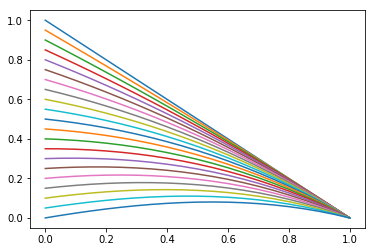

In [9]:
Yt = net.run(x_train).reshape(nx, nt)
for i in range(nt):
    plt.plot(xt, Yt[i])

## Compute the analytical solution.

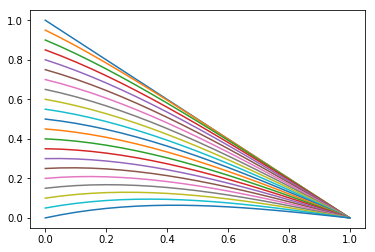

In [10]:
n = nx*nt
Ya = np.zeros(n)
for i in range(n):
    Ya[i] = deq.Yaf(x_train[i])
Ya = Ya.reshape((nx, nt))
for i in range(nt):
    plt.plot(xt, Ya[i])

## Compute the error.

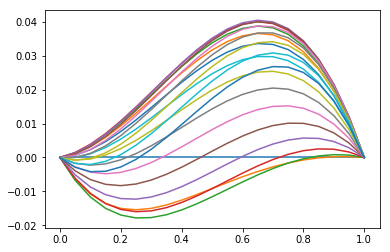

In [11]:
Y_err = Yt - Ya
for i in range(nt):
    plt.plot(xt, Y_err[i])

Try modifying number of x-grid points in factor of 2.
Try tweaking the the minimize options.